## Creating a Linear Associator

# 

# 

Many of the qualitative properties displayed by the linear 
associator are also shown by more complex neural models. While 
completing this assignment, pay attention to these properties and 
include your observations in your writeup

In [3]:
import numpy as np
import pandas as pd
import random as rnd
import math
import statistics
import matplotlib.pyplot as plt 


In [4]:
def ran_vector(dim):
    '''
    Takes in a dimension and returns randomly generated unit vector of
    th
    at dimension from uniform distribution with mean 0.
    
    dim: number of dimensions for generated vectors
    
    returns:
        a numpy array containing a randomly generated unit vector
    '''
    vec = []
    for i in range(dim):
            uni_x = rnd.random()
            vec.append(uni_x)
    array = np.array(vec)
    
    #make distribution mean 0 per hw directions
    npvec = array - (np.mean(array))

    #normalizes vector by dividing by vector length/magnitude
    mag = math.sqrt(sum(npvec ** 2))
    out = npvec / mag 
    return out

In [5]:
def many_vec(n,dim):
    '''
    runs ran_vector many times
    '''
    out = []
    for i in range(n):
        x = ran_vector(dim)
        out.append(x)
    return out

In [6]:
def dot(vec1,vec2):
    out = []
    for i in range(len(vec1)):
        x = vec1[i] * vec2[i]
        out.append(x)
    return sum(out)

In [7]:
def length(vec):
    '''
    Computes the length of a vector.
    
    v: vector
    return:
        a float length of a vector
    '''
    mag = math.sqrt(sum(vec ** 2))
    return mag
    

In [117]:
def find_lengths(x):
    '''
    uses length function on many vectors
    '''
    out = []
    for i in range(len(x)):
        s = length(x[i])
        out.append(s)
    return out

In [5]:
def cos(a,b):
    len_a = np.linalg.norm(a)
    len_b = np.linalg.norm(b)
    norm_a = a/len_a
    norm_b = b/len_b
    cos_angle = np.dot(norm_a,norm_b)
    return cos_angle

# Problem 1

In [14]:
#a)
f = ran_vector(100)
g = ran_vector(100)

A = np.outer(g, f)

### AF

In [365]:
Af = A.dot(f)

In [8]:
cos(Af,g)

1.0

In [9]:
length(Af)

0.9999999999999998

### 1e)
Because both the the cosine between g and gprime(Af) and the length of gprime equal 1, then g and gprime are in the same direction

# Problem 2

In [362]:
# 2a)
fprime = ran_vector(100)

In [73]:
# find cosine of f and f prime
cos(f,fprime)

-0.046425358157704336

In [12]:
def f_dims(dim):
    cos_dim = []
    for i in dim:
        f = ran_vector(i)
        fprime = ran_vector(i)
        x = cos(f,fprime)
        cos_dim.append(x)
    return cos_dim

In [13]:
#As the dimension increases, the cosine between f and fprime gets closer to 0, which means the two vectors are orthogonal.
f_dims([100,1000,10000,50000,1000000])


[0.13153973929943513,
 0.00400086846827797,
 -0.0017365032995895467,
 0.0016946559272500916,
 -0.0004778419101518176]

In [366]:
Afprime = A.dot(fprime)

In [367]:
length(Afprime)

0.0003117433586390035

### 2e) f and fprime are about orthogonal  because the cosine of the angle between them is about zero

### Question: why is it 1?

# Problem 3

In [1]:

def simulation(num_vectors,dim):
    fi = many_vec(num_vectors,dim)
    gi = many_vec(num_vectors,dim)
    fi = fi / np.linalg.norm(fi, axis=1)[:, np.newaxis]
    gi = gi / np.linalg.norm(gi, axis=1)[:, np.newaxis]

    # (b) Compute the outer product matrices, Ai = gifiT
    Ai = np.array([np.outer(gi[i], fi[i]) for i in range(num_vectors)])

    # (c) Form the overall connectivity matrix, A, as the sum of the individual outer product matrices
    A = np.sum(Ai, axis=0)

    # (d) Test the resulting matrix A
    # (i) Compute the predicted output, g', for each stored input, fi using A
    g_prime = np.dot(A, fi.T).T

    #(ii)
    cosine = cos(g_pred,gi.T)

    # (iii) Compute the length of the output vector, g’.
    g_prime_length = find_lengths(g_prime)
    gi_length = find_lengths(gi)

    # (iv) Test the selectivity of the system by generating a new set of 50 random vectors, let’s call them hi, and computing the predicted outputs (hi’) using the A matrix you constructed above (i.e., find the matrix product between each hi vector and A: Ahi).
    hi = np.random.randn(num_vectors, dim)
    hi = hi / np.linalg.norm(hi, axis=1, keepdims=True)

    hi_prime = np.dot(hi, A)
    length_hi_pred = np.linalg.norm(hi_prime, axis=1)
    length_gi = np.linalg.norm(gi, axis=1)
    
    
    print("Average length of hi':", np.mean(length_hi_pred))
    print("Average length of gi:", np.mean(length_gi))
    print("Average cosine:", np.mean(cosine))


In [368]:

simulation(500,100)

Average length of hi': 2.235754255689643
Average length of gi: 1.0
Average cosine: 8.394403263884736e-06


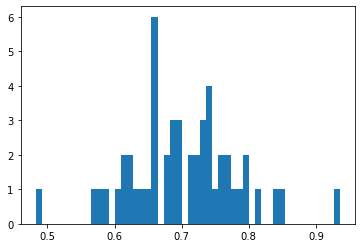

In [369]:
plt.hist(length_hi_pred,bins = 50)
plt.show()

# part 3e


In [351]:
simulation(1,100)

Average length of hi': 0.11513033498962495
Average length of gi: 1.0
Average cosine: 0.003268910842039627


In [352]:
simulation(20,100)

Average length of hi': 0.42733432109824465
Average length of gi: 1.0
Average cosine: -0.00011633086279182909


In [353]:
simulation(60,100)

Average length of hi': 0.7759600334274647
Average length of gi: 1.0
Average cosine: -3.1363267702749497e-06


In [354]:
simulation(80,100)

Average length of hi': 0.8793656802095782
Average length of gi: 1.0
Average cosine: 5.6111762816955224e-05


# Problem 4

In [355]:
def simulation2(num_vectors,dim):
    fi = many_vec(num_vectors,dim)
    gi = many_vec(num_vectors,dim)
    fi = fi / np.linalg.norm(fi, axis=1)[:, np.newaxis]
    gi = gi / np.linalg.norm(gi, axis=1)[:, np.newaxis]

    # (b) Compute the outer product matrices, Ai = gifiT
    Ai = np.array([np.outer(gi[i], fi[i]) for i in range(num_vectors)])

    # (c) Form the overall connectivity matrix, A, as the sum of the individual outer product matrices
    A = np.sum(Ai, axis=0)

    # (d) Test the resulting matrix A
    # (i) Compute the predicted output, g', for each stored input, fi using A
    g_prime = np.dot(A, fi.T).T

    #(ii)
    cosine = cos(g_pred,gi.T)

    # (iii) Compute the length of the output vector, g’.
    g_prime_length = find_lengths(g_prime)
    gi_length = find_lengths(gi)

    # (iv) Test the selectivity of the system by generating a new set of 50 random vectors, let’s call them hi, and computing the predicted outputs (hi’) using the A matrix you constructed above (i.e., find the matrix product between each hi vector and A: Ahi).
    hi = np.random.randn(num_vectors, dim)
    hi = hi / np.linalg.norm(hi, axis=1, keepdims=True)

    hi_prime = np.dot(hi, A)
    length_hi_pred = np.linalg.norm(hi_prime, axis=1)
    length_gi = np.linalg.norm(gi, axis=1)
    
    
    print("Average length of hi':", np.mean(length_hi_pred))
    print("Average length of gi:", np.mean(length_gi))
    return fi,gi, A , g_prime, cosine



In [356]:
def ablation(fi,gi,A,dim,num_ablations):
    for i in range(num_ablations):
        idx = np.random.randint(dim)
        idy = np.random.randint(dim)
        A[idx, idy] = 0
    
    g_prime_ablated = np.dot(A, fi)

    cos_ablated = cos(g_prime_ablated,gi)
    #np.dot(g_prime_ablated, gi) / (np.linalg.norm(g_pred_ablated) * np.linalg.norm(gi))
    return cos_ablated

In [357]:
# normal A
fi1,gi1,A1,g_prime1,cosine_gi = simulation2(100,100)

Average length of hi': 1.002729357407698
Average length of gi: 1.0


In [371]:
np.mean(cosine_gi)

-3.771221195361438e-05

In [358]:
cos_ablated = ablation(fi1,gi1,A1,100,10)

In [359]:
np.mean(cos_ablated)

2.0383000842727484e-21

In [11]:

fi = f / np.linalg.norm(f, axis=1)[:, np.newaxis]
gi = g / np.linalg.norm(g, axis=1)[:, np.newaxis]

In [20]:
np.dot(A,f)

array([-0.15315591,  0.06941098,  0.08807675, -0.03773783,  0.0956544 ,
       -0.15591544,  0.08651415,  0.04044791, -0.02187383, -0.11136061,
       -0.09327441,  0.07071151,  0.14409681,  0.00983706, -0.01186194,
        0.02886557,  0.11851815, -0.00087405, -0.10891151,  0.12894602,
       -0.118704  ,  0.04465205, -0.05365825, -0.21817349,  0.0389496 ,
        0.09826766,  0.05348287,  0.00082162,  0.01963118, -0.00322311,
       -0.14355992,  0.10751018, -0.01152217,  0.12395863, -0.08100829,
       -0.08747844,  0.07940631,  0.07330099, -0.13778772,  0.06854847,
        0.08562799,  0.13142409, -0.0049632 ,  0.15463302, -0.11419542,
       -0.01714239, -0.03380438, -0.05592824, -0.14505042,  0.00504078,
        0.03405776, -0.1974464 , -0.00802118,  0.10141982, -0.08078886,
        0.08574822,  0.1372605 ,  0.031248  , -0.17230081,  0.095548  ,
        0.03600183,  0.06999967, -0.04628266, -0.04207477, -0.03457861,
        0.08216402, -0.05193078,  0.09394248,  0.07882874,  0.02

In [21]:
np.dot(A, fi.T).T

array([[-3.16703316e-04,  1.43531438e-04,  1.82129437e-04, ...,
         2.52930479e-05,  1.07921885e-06, -2.60505789e-04],
       [ 4.86737564e-03, -2.20591761e-03, -2.79912568e-03, ...,
        -3.88725848e-04, -1.65863864e-05,  4.00368253e-03],
       [-6.83260814e-03,  3.09657025e-03,  3.92928969e-03, ...,
         5.45676272e-04,  2.32832407e-05, -5.62019368e-03],
       ...,
       [ 2.19901671e-02, -9.96604750e-03, -1.26460840e-02, ...,
        -1.75621259e-03, -7.49351261e-05,  1.80881145e-02],
       [-1.46180701e-02,  6.62497836e-03,  8.40654563e-03, ...,
         1.16745082e-03,  4.98134881e-05, -1.20241617e-02],
       [-5.26787352e-03,  2.38742514e-03,  3.02944361e-03, ...,
         4.20711026e-04,  1.79511490e-05, -4.33311392e-03]])